In [1]:
#!pip install dtw-python


In [2]:
import pandas as pd
import numpy as np
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
df=pd.read_csv('02 DB Commodities/data.csv')

In [4]:
df=df.drop(columns=['Date'])
df.head()

,cocoa,crude_oil,cotton,gold,lean_hogs,copper,coffe,wheat,live_cattle,natural_gas,platinum,sugar,silver,corn,oat,rough_rice,soybean
0,1936.0,60.369999,77.500000,1313.699951,70.724998,3.2560,130.199997,434.75,123.349998,3.056,943.799988,15.33,17.121000,353.25,242.50,1153.5,955.00
1,1907.0,61.630001,78.110001,1316.199951,71.050003,3.2370,128.600006,441.00,122.949997,3.008,957.799988,15.31,17.184999,353.00,244.50,1141.0,959.75
2,1905.0,62.009998,79.250000,1319.400024,71.375000,3.2425,129.550003,439.75,122.250000,2.880,966.099976,15.25,17.188999,351.00,245.75,1147.5,959.25
3,1895.0,61.439999,78.010002,1320.300049,71.425003,3.2070,128.449997,437.50,119.250000,2.795,971.200012,15.08,17.205000,351.25,248.50,1156.5,961.50
4,1914.0,61.730000,78.139999,1318.599976,72.974998,3.2010,125.150002,433.25,117.224998,2.835,972.299988,14.78,17.063999,347.25,250.00,1164.5,958.25


In [5]:
x=df.drop(columns=['coffe'])
y=df['coffe']


In [11]:
x2 = x['cotton'].to_numpy()
x2

array([77.5       , 78.11000061, 79.25      , 78.01000214, 78.13999939,
       78.34999847, 79.65000153, 82.65000153, 81.68000031, 81.43000031,
       82.13999939, 82.62999725, 83.41999817, 83.41000366, 82.26000214,
       82.26999664, 81.87999725, 80.48000336, 77.02999878, 77.27999878,
       78.34999847, 77.30000305, 76.56999969, 76.19000244, 75.95999908,
       76.62000275, 76.68000031, 76.44999695, 76.37999725, 75.59999847,
       75.41000366, 75.72000122, 77.51000214, 78.91000366, 80.54000092,
       81.44999695, 81.69999695, 81.76000214, 81.65000153, 82.56999969,
       82.72000122, 85.41000366, 83.83999634, 84.19999695, 85.12000275,
       84.51999664, 83.27999878, 82.98000336, 83.44000244, 83.52999878,
       82.84999847, 81.23000336, 83.08000183, 82.58999634, 82.15000153,
       81.83000183, 81.77999878, 82.01999664, 80.73999786, 81.45999908,
       80.97000122, 82.01999664, 79.63999939, 82.56999969, 82.54000092,
       82.91000366, 83.52999878, 83.83000183, 83.69000244, 83.41

In [12]:
y2 = y.to_numpy()
y2

array([130.19999695, 128.6000061 , 129.55000305, 128.44999695,
       125.15000153, 125.15000153, 123.94999695, 122.80000305,
       122.25      , 120.44999695, 123.09999847, 121.09999847,
       121.25      , 122.55000305, 120.94999695, 122.5       ,
       123.65000153, 125.15000153, 122.30000305, 121.84999847,
       121.40000153, 120.40000153, 119.80000305, 122.84999847,
       123.30000305, 122.84999847, 121.84999847, 121.40000153,
       122.75      , 122.80000305, 121.75      , 117.94999695,
       118.19999695, 116.94999695, 119.59999847, 119.44999695,
       120.5       , 119.94999695, 121.05000305, 122.44999695,
       120.34999847, 119.19999695, 119.94999695, 119.30000305,
       119.        , 118.84999847, 118.15000153, 120.44999695,
       119.94999695, 117.65000153, 116.94999695, 118.34999847,
       118.94999695, 118.84999847, 119.        , 117.19999695,
       118.15000153, 118.94999695, 117.75      , 118.15000153,
       116.40000153, 116.59999847, 116.90000153, 117.55

In [36]:
from sklearn.preprocessing import normalize
normx = x2 / np.linalg.norm(x2)
normy = y2 / np.linalg.norm(y2)

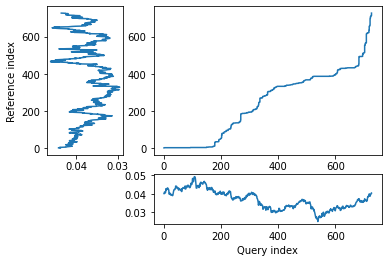

<AxesSubplot:>

In [37]:
alignment = dtw(normx, normy, keep_internals=True)

alignment.plot(type="threeway")

In [38]:
print(asymmetricP0)



Step pattern recursion:
 g[i,j] = min(
     g[i  ,j-1] + 0 * d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-1,j  ] +     d[i  ,j  ] ,
 ) 

Normalization hint: N



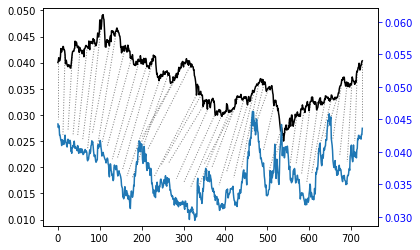

<AxesSubplot:>

In [42]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(normx, normy, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-0.015)

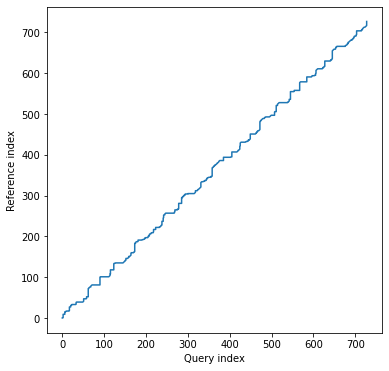

Text(0.5, 17.200000000000003, 'test X')

In [44]:
# Use a windowing restrain
alignment = dtw(normx, normy, keep_internals=True,
    window_type="sakoechiba", window_args={'window_size': 10})\
    .plot()

#alignment.set_xlabel("test X")